In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

# Load Dataset

In [2]:
#load sample data
df = pd.read_csv("Comp_Metals_with_descriptor.csv")
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Has Bandstructure,Volume,Nsites,Theoretical,Count,Density (gm/cc),Crystal System,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_b

In [3]:
df.shape

(11869, 303)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11869 entries, 0 to 11868
Columns: 303 entries, Materials Id to min:Polarizability
dtypes: bool(2), float64(239), int64(58), object(4)
memory usage: 27.3+ MB


# Pre-processing

In [5]:
#Drop needless columns
df2=df.drop(["Materials Id", "Formula"], axis=1)
df2.head()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Has Bandstructure,Volume,Nsites,Theoretical,Count,Density (gm/cc),Crystal System,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_

In [6]:
#count each column's NaN
#ref:https://obgynai.com/python-pandas-nan/
pd.set_option('display.max_row', 1000)
df2.isnull().sum()/len(df2)

Spacegroup                           0.000000
Formation Energy (eV)                0.000000
E Above Hull (eV)                    0.000000
Band Gap (eV)                        0.000000
Has Bandstructure                    0.000000
Volume                               0.000000
Nsites                               0.000000
Theoretical                          0.000000
Count                                0.997135
Density (gm/cc)                      0.000000
Crystal System                       0.000000
ave:atomic_number                    0.000000
ave:atomic_radius                    0.000000
ave:atomic_radius_rahm               0.000000
ave:atomic_volume                    0.000000
ave:atomic_weight                    0.000000
ave:boiling_point                    0.000000
ave:bulk_modulus                     0.000000
ave:c6_gb                            0.000000
ave:covalent_radius_cordero          0.000000
ave:covalent_radius_pyykko           0.000000
ave:covalent_radius_pyykko_double 

In [7]:
#Drop columns witch have a lot of NaN
df2=df2.drop(["Count"], axis=1)
df2.head()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Has Bandstructure,Volume,Nsites,Theoretical,Density (gm/cc),Crystal System,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_la

In [8]:
#One hot encording
#ref:https://vector-ium.com/ohe-coding/
class_feature=["Spacegroup","Has Bandstructure","Theoretical","Crystal System"]
df2=pd.get_dummies(df2, columns=class_feature)
df2.head()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Volume,Nsites,Density (gm/cc),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_latcnt,max:gs_mag_moment,max:gs_volume_per,max:hhi_p,max:h

In [9]:
#Scaling
scaled = (df2 - df2.mean()) / df2.std(ddof=1)
#scaled_y = (y - y.mean()) / y.std(ddof=1)
scaled.head()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Volume,Nsites,Density (gm/cc),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_latcnt,max:gs_mag_moment,max:gs_volume_per,max:hhi_p,max:h

In [10]:
#count each column's NaN and drop them
#scaled_x.isnull().sum()/len(scaled_x)
scaled = scaled.drop(["min:gs_bandgap","min:num_f_unfilled","min:num_p_valence", "min:num_p_unfilled"], axis=1)

In [11]:
scaled.head()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Volume,Nsites,Density (gm/cc),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_latcnt,max:gs_mag_moment,max:gs_volume_per,max:hhi_p,max:h

# Calculate Clusters using by training data, and predict test data's clusters

In [12]:
max_num_of_clusters = 15
test_ratio = 0.3 #use 70% of data for training

In [13]:
#use K-means
#ref: https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means
from sklearn.cluster import KMeans

In [14]:
#devide dataset training-test
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled, test_size=test_ratio,random_state=0)

#devide x and y
train_y=train["Band Gap (eV)"]
train_x=train.drop(["Band Gap (eV)"],axis=1)
test_y=test["Band Gap (eV)"]
test_x=test.drop(["Band Gap (eV)"],axis=1)
test_x.head()

,Formation Energy (eV),E Above Hull (eV),Volume,Nsites,Density (gm/cc),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_latcnt,max:gs_mag_moment,max:gs_volume_per,max:hhi_p,max:hhi_r,max:heat_

In [80]:
print("train:",train_x.shape)
print("test:",test_x.shape)

train: (8308, 481)
test: (3561, 481)


In [15]:
#make cluster model
cluster_model = KMeans(n_clusters=max_num_of_clusters, init='k-means++', n_init=20, max_iter=100)

In [16]:
#training kmeans model and predict training data clusters.
cluster = cluster_model.fit_predict(train_x) 

In [17]:
#add cluster_id to training dataset
train_x["cluster_id"]=cluster

In [18]:
# get centroid xy coordinate using by trained cluster model. Just check.
#ref: https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2
#cluster_model.cluster_centers_[:,0] #x-axis
cluster_model.cluster_centers_[:,1] #y-axis

array([-0.12810217,  0.02081244, -0.27038049,  0.14348205, -0.03644143,
       -0.14659695,  0.136641  , -0.17397982, -0.01706092, -0.00721326,
       -0.20106051,  0.09371958,  0.57751757, -0.08237272, -0.2827802 ])

In [19]:
#predict test data's cluster using by train centroids.
test_x["cluster_id"] = cluster_model.predict(test_x) 

In [20]:
test_x.head()

,Formation Energy (eV),E Above Hull (eV),Volume,Nsites,Density (gm/cc),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,ave:covalent_radius_pyykko_double,ave:covalent_radius_pyykko_triple,ave:covalent_radius_slater,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,ave:en_allen,ave:en_ghosh,ave:en_pauling,ave:first_ion_en,ave:fusion_enthalpy,ave:gs_bandgap,ave:gs_energy,ave:gs_est_bcc_latcnt,ave:gs_est_fcc_latcnt,ave:gs_mag_moment,ave:gs_volume_per,ave:hhi_p,ave:hhi_r,ave:heat_capacity_mass,ave:heat_capacity_molar,ave:icsd_volume,ave:evaporation_heat,ave:heat_of_formation,ave:lattice_constant,ave:mendeleev_number,ave:melting_point,ave:molar_volume,ave:num_unfilled,ave:num_valance,ave:num_d_unfilled,ave:num_d_valence,ave:num_f_unfilled,ave:num_f_valence,ave:num_p_unfilled,ave:num_p_valence,ave:num_s_unfilled,ave:num_s_valence,ave:period,ave:specific_heat,ave:thermal_conductivity,ave:vdw_radius,ave:vdw_radius_alvarez,ave:vdw_radius_mm3,ave:vdw_radius_uff,ave:sound_velocity,ave:Polarizability,sum:atomic_number,sum:atomic_radius,sum:atomic_radius_rahm,sum:atomic_volume,sum:atomic_weight,sum:boiling_point,sum:bulk_modulus,sum:c6_gb,sum:covalent_radius_cordero,sum:covalent_radius_pyykko,sum:covalent_radius_pyykko_double,sum:covalent_radius_pyykko_triple,sum:covalent_radius_slater,sum:density,sum:dipole_polarizability,sum:electron_negativity,sum:electron_affinity,sum:en_allen,sum:en_ghosh,sum:en_pauling,sum:first_ion_en,sum:fusion_enthalpy,sum:gs_bandgap,sum:gs_energy,sum:gs_est_bcc_latcnt,sum:gs_est_fcc_latcnt,sum:gs_mag_moment,sum:gs_volume_per,sum:hhi_p,sum:hhi_r,sum:heat_capacity_mass,sum:heat_capacity_molar,sum:icsd_volume,sum:evaporation_heat,sum:heat_of_formation,sum:lattice_constant,sum:mendeleev_number,sum:melting_point,sum:molar_volume,sum:num_unfilled,sum:num_valance,sum:num_d_unfilled,sum:num_d_valence,sum:num_f_unfilled,sum:num_f_valence,sum:num_p_unfilled,sum:num_p_valence,sum:num_s_unfilled,sum:num_s_valence,sum:period,sum:specific_heat,sum:thermal_conductivity,sum:vdw_radius,sum:vdw_radius_alvarez,sum:vdw_radius_mm3,sum:vdw_radius_uff,sum:sound_velocity,sum:Polarizability,var:atomic_number,var:atomic_radius,var:atomic_radius_rahm,var:atomic_volume,var:atomic_weight,var:boiling_point,var:bulk_modulus,var:c6_gb,var:covalent_radius_cordero,var:covalent_radius_pyykko,var:covalent_radius_pyykko_double,var:covalent_radius_pyykko_triple,var:covalent_radius_slater,var:density,var:dipole_polarizability,var:electron_negativity,var:electron_affinity,var:en_allen,var:en_ghosh,var:en_pauling,var:first_ion_en,var:fusion_enthalpy,var:gs_bandgap,var:gs_energy,var:gs_est_bcc_latcnt,var:gs_est_fcc_latcnt,var:gs_mag_moment,var:gs_volume_per,var:hhi_p,var:hhi_r,var:heat_capacity_mass,var:heat_capacity_molar,var:icsd_volume,var:evaporation_heat,var:heat_of_formation,var:lattice_constant,var:mendeleev_number,var:melting_point,var:molar_volume,var:num_unfilled,var:num_valance,var:num_d_unfilled,var:num_d_valence,var:num_f_unfilled,var:num_f_valence,var:num_p_unfilled,var:num_p_valence,var:num_s_unfilled,var:num_s_valence,var:period,var:specific_heat,var:thermal_conductivity,var:vdw_radius,var:vdw_radius_alvarez,var:vdw_radius_mm3,var:vdw_radius_uff,var:sound_velocity,var:Polarizability,max:atomic_number,max:atomic_radius,max:atomic_radius_rahm,max:atomic_volume,max:atomic_weight,max:boiling_point,max:bulk_modulus,max:c6_gb,max:covalent_radius_cordero,max:covalent_radius_pyykko,max:covalent_radius_pyykko_double,max:covalent_radius_pyykko_triple,max:covalent_radius_slater,max:density,max:dipole_polarizability,max:electron_negativity,max:electron_affinity,max:en_allen,max:en_ghosh,max:en_pauling,max:first_ion_en,max:fusion_enthalpy,max:gs_bandgap,max:gs_energy,max:gs_est_bcc_latcnt,max:gs_est_fcc_latcnt,max:gs_mag_moment,max:gs_volume_per,max:hhi_p,max:hhi_r,max:heat_

# Build PLS models for each cluster

In [73]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
import matplotlib.figure as figure
import warnings
warnings.filterwarnings("ignore")

In [23]:
#setting
pls_component_number = 3
max_pls_component_number = 10 #set maximum component
fold_number=10

In [25]:
#Prepare
train_type = pd.DataFrame({"cluster":train_x["cluster_id"]})
test_type = pd.DataFrame({"cluster":test_x["cluster_id"]})

X_short = pd.DataFrame({'ind': list(train_type.index), 
                        'type': train_type['cluster'].values,
                        'oof': [0] * len(train_type), 
                        'target': train_y.values})
X_short_test = pd.DataFrame({'ind': list(test_type.index), 
                             'type': test_type['cluster'].values, 
                             'prediction': [0] * len(test_type)})

In [74]:
CV_score = 0

#Devide dataset for each cluster and build PLS model
for t in train_type['cluster'].unique():
    index_type = (train_type['cluster'] == t)
    index_type_test = (test_type['cluster'] == t)
    
    #pick cluster "t" dataset up
    X_t = train_x.loc[index_type].copy()
    X_test_t = test_x.loc[index_type_test].copy()
    y_t = train_y[index_type]

    #Build PLS model
    #ref:https://datachemeng.com/wp-content/uploads/assignment14.py
    pls_components = np.arange(1, min(np.linalg.matrix_rank(X_t) + 1, max_pls_component_number + 1), 1)
    r2all = list()
    r2cvall = list()
    for pls_component in pls_components:
        pls_model_in_cv = PLSRegression(n_components=pls_component)
        pls_model_in_cv.fit(X_t, y_t)
        calculated_y_in_cv = np.ndarray.flatten(pls_model_in_cv.predict(X_t))
        estimated_y_in_cv = np.ndarray.flatten(
            model_selection.cross_val_predict(pls_model_in_cv, X_t, y_t, cv=fold_number))
        #if do_autoscaling:
        #    calculated_y_in_cv = calculated_y_in_cv * y.std(ddof=1) + y.mean()
        #    estimated_y_in_cv = estimated_y_in_cv * y.std(ddof=1) + y.mean()

        r2all.append(float(1 - sum((y_t - calculated_y_in_cv) ** 2) / sum((y_t - y_t.mean()) ** 2)))
        r2cvall.append(float(1 - sum((y_t - estimated_y_in_cv) ** 2) / sum((y_t - y_t.mean()) ** 2)))
    
        optimal_pls_component_number = np.where(r2cvall == np.max(r2cvall))
        optimal_pls_component_number = optimal_pls_component_number[0][0] + 1
        regression_model = PLSRegression(n_components=optimal_pls_component_number)

    result_dict_PLS = regression_model.fit(X_t, y_t)
    
    
    X_short.loc[X_short['type'] == t, 'oof'] = result_dict_PLS.predict(X_t)
    X_short_test.loc[X_short_test['type'] == t, 'prediction'] = result_dict_PLS.predict(X_test_t)
    # calculate y
    calculated_ytrain = np.ndarray.flatten(result_dict_PLS.predict(X_t))
    # r2
    print(f'cluter:{t}','r2: {0}'.format(float(1 - sum((y_t - calculated_ytrain) ** 2) / sum((y_t - y_t.mean()) ** 2))))
    
    ## manually computing the cv score
    #CV_score += np.log(np.array(result_dict_PLS['scores']).mean())/15 # total 15 types

cluter:6 r2: 0.36108955978283785
cluter:8 r2: 0.3753153972097685
cluter:4 r2: 0.08670081628972837
cluter:10 r2: 0.7434561588041119
cluter:1 r2: 0.9098319551474632
cluter:7 r2: 0.9942368010739504
cluter:2 r2: 0.4756374822034275
cluter:0 r2: 0.1155487883666696
cluter:5 r2: 0.6626398344495399
cluter:9 r2: 0.6781069598886194
cluter:11 r2: 0.08933516716853429
cluter:12 r2: 0.7573016500146665
cluter:3 r2: 0.3832916577399327
cluter:13 r2: 0.9415010565033697
cluter:14 r2: 0.4991698510777126


In [78]:
print("Data:",len(X_short["oof"]))
print("Train r2:", r2_score(train_y, X_short["oof"]))

Data: 8308
Train r2: 0.632471254989548


In [79]:
print("Data:",len(X_short_test["prediction"]))
print("Test r2:", r2_score(test_y, X_short_test["prediction"]))

Data: 3561
Test r2: 0.5591842431766121


# Plot y-y_pred result

Text(0, 0.5, 'y_pred')

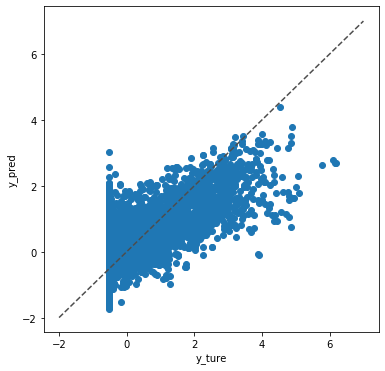

In [72]:
#Train plot
fig = plt.figure(figsize=(6, 6)) 
plt.scatter(train_y, X_short["oof"],vmax=7, vmin=7)
plt.plot([-2, 7], [-2, 7], ls="--", c=".3")
plt.xlabel("y_ture")
plt.ylabel("y_pred")

Text(0, 0.5, 'y_pred')

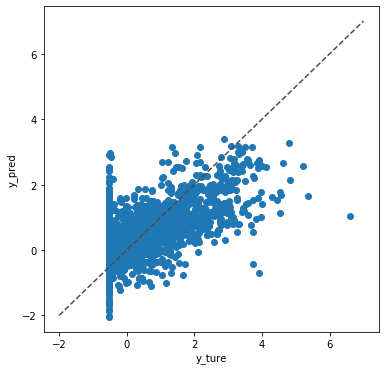

In [64]:
#Test plot
fig = plt.figure(figsize=(6, 6)) 
plt.scatter(test_y, X_short_test["prediction"],vmax=7, vmin=7)
plt.plot([-2, 7], [-2, 7], ls="--", c=".3")
plt.xlabel("y_ture")
plt.ylabel("y_pred")